In [1]:
import pandas as pd

df=pd.read_csv('fraud.csv', index_col = 0)

# Check your data and define X and y : What is X and what is y? 
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values
df.shape

(21693, 30)

In [2]:
# perform train - test split. (40% as testing and 60% as training)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

#X_train, X_test, y_train, y_test = train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.40, 
                                    random_state=1)
X_train.shape

(13015, 29)

In [3]:
def my_KNN_classifier(X_train, y_train):
    #--------------------------------------------------
    ## ----------- K-NN Classifier ------------------## 
    #--------------------------------------------------

    from sklearn.neighbors import KNeighborsClassifier

    steps = [('scaler', StandardScaler()),         
            ('knn', KNeighborsClassifier(n_neighbors = 3))]

    knn_pipeline = Pipeline(steps)
    knn_pipeline.fit(X_train, y_train)

    #--------------------------------------------------
    ## Model Evaluation ## 
    #--------------------------------------------------


    ypred_test = knn_pipeline.predict(X_test)
    report_clf = classification_report(y_test, ypred_test, output_dict= True)

    macro_avg_precision = report_clf['macro avg']['precision']
    macro_avg_recall = report_clf['macro avg']['recall']
    
    return macro_avg_precision, macro_avg_recall

In [4]:
def my_SVC_classifier(X_train, y_train):
    from sklearn.svm import SVC

    ## Linear Kernel  ---------------
    steps = [('scaler', StandardScaler()),         
            ('svc', SVC(kernel = 'linear',
                        class_weight='balanced'))]

    svcL_pipeline = Pipeline(steps)
    svcL_pipeline.fit(X_train, y_train)
    ypred_test = svcL_pipeline.predict(X_test)
    report_clf = classification_report(y_test, ypred_test, output_dict= True)
    
    lr_precision = report_clf['macro avg']['precision']
    lr_recall = report_clf['macro avg']['recall']

    ## Polynomial Kernel -----------------------
    steps = [('scaler', StandardScaler()),         
            ('svc', SVC(kernel = 'poly', degree = 3, 
                        class_weight='balanced'))]

    svcPoly_pipeline = Pipeline(steps)
    svcPoly_pipeline.fit(X_train, y_train)
    ypred_test = svcPoly_pipeline.predict(X_test)
    report_clf = classification_report(y_test, ypred_test, output_dict= True)
    
    poly_precision = report_clf['macro avg']['precision']
    poly_recall = report_clf['macro avg']['recall']

    ## RBF Kernel -----------------------
    steps = [('scaler', StandardScaler()),         
            ('svc', SVC(kernel = 'rbf', gamma = 'scale',
                        class_weight='balanced'))]

    svcRBF_pipeline = Pipeline(steps)
    svcRBF_pipeline.fit(X_train, y_train)
    ypred_test = svcRBF_pipeline.predict(X_test)
    report_clf = classification_report(y_test, ypred_test, output_dict= True)

    rbf_precision = report_clf['macro avg']['precision']
    rbf_recall = report_clf['macro avg']['recall']
    
    return lr_precision, lr_recall, poly_precision, poly_recall, rbf_precision, rbf_recall

In [5]:
df_slr = {}
knn_p, knn_recall = my_KNN_classifier(X_train, y_train)
df_slr['KNN'] = [knn_p, knn_recall]
lr_precision, lr_recall, poly_precision, poly_recall, rbf_precision, rbf_recall = my_SVC_classifier(X_train, y_train)
df_slr['SVC-linear'] = [lr_precision, lr_recall]
df_slr['SVC-Poly'] = [poly_precision, poly_recall]
df_slr['SVC-rbf'] = [rbf_precision, rbf_recall]
df_table = pd.DataFrame.from_dict(df_slr, orient ='index')   
df_table.columns = ['precision', 'recall'] 

     k  accuracy  precision    recall  f1_score       auc
0    1  0.994584   0.835821  0.817518  0.826568  0.907471
1    2  0.996197   0.972727  0.781022  0.866397  0.911790
2    3  0.996428   0.973214  0.795620  0.875502  0.915348
3    4  0.996428   0.973214  0.795620  0.875502  0.918772
4    5  0.996428   0.973214  0.795620  0.875502  0.918623
5    6  0.996082   0.972477  0.773723  0.861789  0.918460
6    7  0.996313   0.972973  0.788321  0.870968  0.925595
7    8  0.995852   0.971963  0.759124  0.852459  0.925316
8    9  0.995967   0.972222  0.766423  0.857143  0.925164
9   10  0.995967   0.972222  0.766423  0.857143  0.925017
10  11  0.995967   0.972222  0.766423  0.857143  0.924905
11  12  0.995736   0.971698  0.751825  0.847737  0.928521
12  13  0.995736   0.971698  0.751825  0.847737  0.932194
13  14  0.995736   0.971698  0.751825  0.847737  0.932119
14  15  0.995736   0.971698  0.751825  0.847737  0.931988
15  16  0.995621   0.971429  0.744526  0.842975  0.931891
16  17  0.9957

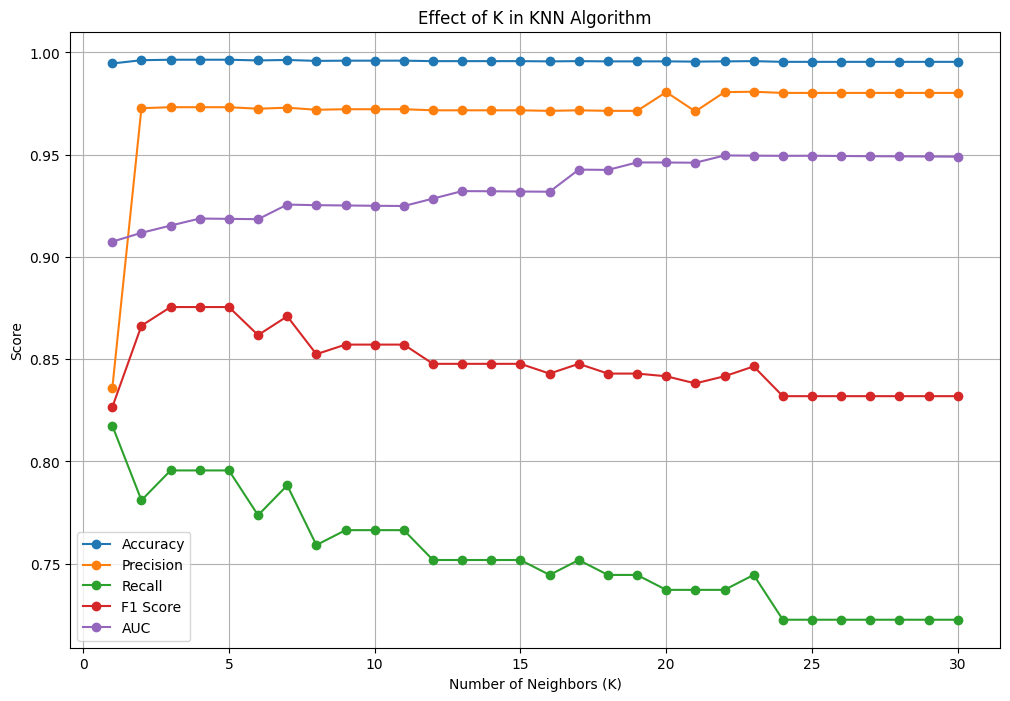

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('fraud.csv', index_col=0)

# Define features and target
y = df['Class'].values
df = df.iloc[:, 1:]
X = df.drop(columns='Class').values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

# Define a dictionary to store results
results = {
    'k': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'auc': []
}

# Loop through different values of k
for k in range(1, 31):
    # Create a KNN pipeline
    steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=k))]
    knn_pipeline = Pipeline(steps)
    
    # Train the model
    knn_pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    ypred_test = knn_pipeline.predict(X_test)
    ypred_testP = knn_pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = (ypred_test == y_test).mean()
    report = classification_report(y_test, ypred_test, output_dict=True)
    if '1' in report:
        precision = report['1']['precision']
        recall = report['1']['recall']
        f1_score = report['1']['f1-score']
    else:
        precision = recall = f1_score = 0.0
    auc = roc_auc_score(y_test, ypred_testP)
    
   
    results['k'].append(k)
    results['accuracy'].append(accuracy)
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['f1_score'].append(f1_score)
    results['auc'].append(auc)


results_df = pd.DataFrame(results)

print(results_df)

plt.figure(figsize=(12, 8))
plt.plot(results_df['k'], results_df['accuracy'], label='Accuracy', marker='o')
plt.plot(results_df['k'], results_df['precision'], label='Precision', marker='o')
plt.plot(results_df['k'], results_df['recall'], label='Recall', marker='o')
plt.plot(results_df['k'], results_df['f1_score'], label='F1 Score', marker='o')
plt.plot(results_df['k'], results_df['auc'], label='AUC', marker='o')

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Score')
plt.title('Effect of K in KNN Algorithm')
plt.legend()
plt.grid(True)


for k, acc, prec, rec, f1, auc in zip(results_df['k'], results_df['accuracy'], 
                                       results_df['precision'], results_df['recall'], 
                                       results_df['f1_score'], results_df['auc']):
    annotation = f'k={k}\nAcc={acc:.2f}\nPrec={prec:.2f}\nRec={rec:.2f}\nF1={f1:.2f}\nAUC={auc:.2f}'
    #plt.text(max(results_df['k']) + 1, max(acc, prec, rec, f1, auc), annotation, ha='left', va='center', fontsize=8)

plt.show()


In [ ]:
df_table

,precision,recall
KNN,0.984973,0.897635
SVC-linear,0.665705,0.927439
SVC-Poly,0.828658,0.894532
SVC-rbf,0.767208,0.881534
